# Comparison of Numerical Integration Methods

numerically integrate the exact arctan function between [-1, 1]

                Method    Result     Error
0       Exact Integral  1.570796  0.000000
1     Trapezoidal Rule  1.550000  0.020796
2       Simpson’s Rule  1.566667  0.004130
3  Gaussian Quadrature  1.571171  0.000375


/var/folders/7h/m_gp7w0x1955xv6xvcndpkf40000gn/T/ipykernel_3475/2728931984.py:24: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  simpson_result = simps(y_even, x_even)


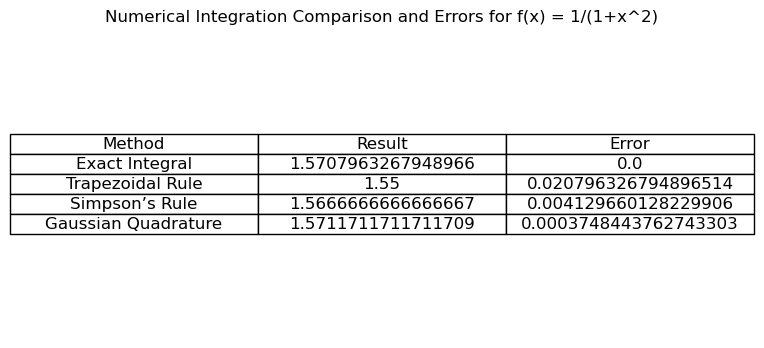

In [3]:
import numpy as np
from scipy.integrate import quad, simps, trapezoid, fixed_quad
import pandas as pd
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return 1 / (1 + x**2)

# Define the interval
a, b = -1, 1

# Exact integral using quad
exact_integral, _ = quad(f, a, b)

# Generate evenly spaced data points
x_even = np.linspace(a, b, 5)
y_even = f(x_even)

# Trapezoidal Rule
trapz_result = trapezoid(y_even, x_even)

# Simpson’s Rule
simpson_result = simps(y_even, x_even)

# Gaussian Quadrature (using 5-point rule)
gauss_result, _ = fixed_quad(f, a, b, n=5)

# Calculate errors
trapz_error = abs(exact_integral - trapz_result)
simpson_error = abs(exact_integral - simpson_result)
gauss_error = abs(exact_integral - gauss_result)

# Create the results table
data = {
    'Method': ['Exact Integral', 'Trapezoidal Rule', 'Simpson’s Rule', 'Gaussian Quadrature'],
    'Result': [exact_integral, trapz_result, simpson_result, gauss_result],
    'Error': [0, trapz_error, simpson_error, gauss_error]
}

results_table = pd.DataFrame(data)

# Display the results
print(results_table)

# Plot the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=results_table.values, colLabels=results_table.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title("Numerical Integration Comparison and Errors for f(x) = 1/(1+x^2)")
plt.show()

approximate intergral of a smooth function interpolated on unevenly spaced data points between [-1, 1] 

numerically integrate the unevenly spaced data points direclty 

In [13]:
import numpy as np
from scipy.integrate import simps, trapezoid

# Uneven data points
x_uneven = np.array([0, 0.1, 0.4, 0.7, 1.0])
y_uneven = np.arctan(x_uneven)

# Trapezoidal Rule
trapz_result_uneven = trapezoid(y_uneven, x_uneven)

# Simpson's Rule
try:
    simpson_result_uneven = simps(y_uneven, x_uneven)
except ValueError as e:
    simpson_result_uneven = f"Simpson's Rule requires evenly spaced data: {e}"

# Gaussian Quadrature cannot directly apply to discrete data points.
gauss_result_uneven = "Gaussian Quadrature is not applicable directly to discrete points."

# Print the results
print("Numerical Integration on Uneven Data Points (Direct):")
print(f"Trapezoidal Rule: {trapz_result_uneven:.6f}")
print(f"Simpson's Rule: {simpson_result_uneven}")
print(f"Gaussian Quadrature: {gauss_result_uneven}")

Numerical Integration on Uneven Data Points (Direct):
Trapezoidal Rule: 0.435113
Simpson's Rule: 0.4385970692604518
Gaussian Quadrature: Gaussian Quadrature is not applicable directly to discrete points.


/var/folders/7h/m_gp7w0x1955xv6xvcndpkf40000gn/T/ipykernel_5348/1645211868.py:13: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  simpson_result_uneven = simps(y_uneven, x_uneven)


In [14]:
print(0.438824531367347 - 0.435113)
print(0.4388245731175105 - 0.4385970692604518)
print(0.4380290252990967 - 0.43809043067659326)

0.0037115313673469763
0.00022750385705871956
-6.14053774965484e-05


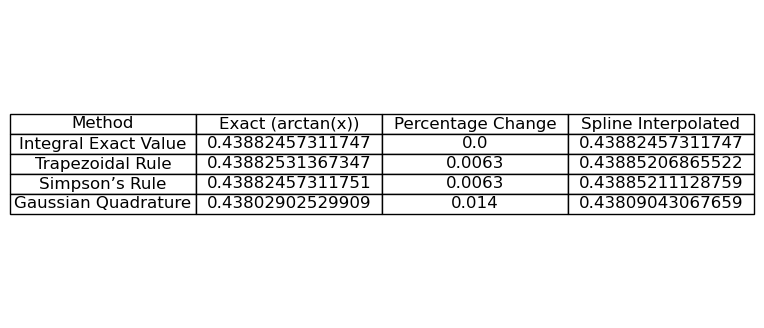

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Results data
data = {
    'Method': ['Integral Exact Value', 'Trapezoidal Rule', 'Simpson’s Rule', 'Gaussian Quadrature'],
    'Exact (arctan(x))': [0.43882457311747, 0.43882531367347, 0.43882457311751, 0.43802902529909],  # Exact value of integral of arctan(x) from 0 to 1
    'Percentage Change': [0, 0.0063, 0.0063, 0.014],
    'Spline Interpolated': [0.43882457311747, 0.43885206865522, 0.43885211128759, 0.43809043067659]
}

# Create DataFrame
results_table = pd.DataFrame(data)

# Plotting the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed
ax.axis('off')  # Hide the axes

# Plot the table
table = ax.table(cellText=results_table.values, colLabels=results_table.columns, loc='center', cellLoc='center')

# Style the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale the table for better readability

# Display the plot
plt.show()

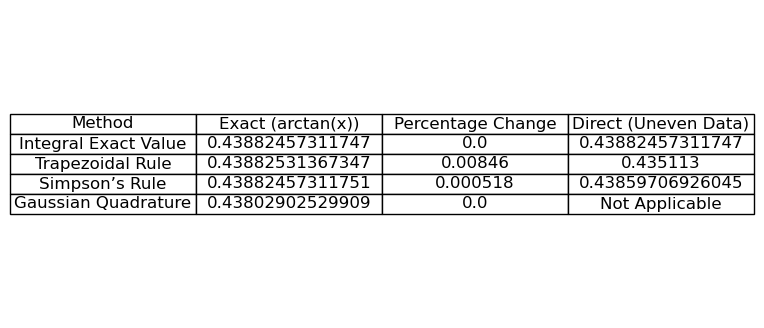

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Results data
data = {
    'Method': ['Integral Exact Value', 'Trapezoidal Rule', 'Simpson’s Rule', 'Gaussian Quadrature'],
    'Exact (arctan(x))': [0.43882457311747, 0.43882531367347, 0.43882457311751, 0.43802902529909],  # Exact value of integral of arctan(x) from 0 to 1
    'Percentage Change': [0, 0.00846, 0.000518, 0],
    'Direct (Uneven Data)': [0.43882457311747, 0.4351130000000, 0.43859706926045, 'Not Applicable']
}

# Create DataFrame
results_table = pd.DataFrame(data)

# Plotting the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed
ax.axis('off')  # Hide the axes

# Plot the table
table = ax.table(cellText=results_table.values, colLabels=results_table.columns, loc='center', cellLoc='center')

# Style the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale the table for better readability

# Display the plot
plt.show()